**Описание колонок**

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved 

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment 

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - 1 or 0

**Импорт библиотек**

In [151]:
from sklearn.utils.multiclass import unique_labels
from typing import Dict
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, \
    balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn.tree import DecisionTreeClassifier

%matplotlib inline 
sns.set(style="ticks")

**Загрузка датасета и вывод первых пяти строк**

In [76]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Вывод размеров датасета**

In [77]:
data.shape

(303, 14)

**Вывод списка столбцов**

In [78]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Вывод типов столбцов**

In [79]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**Проверка датасета на пропуски**

Пропусков нет

In [80]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Парные диаграммы**

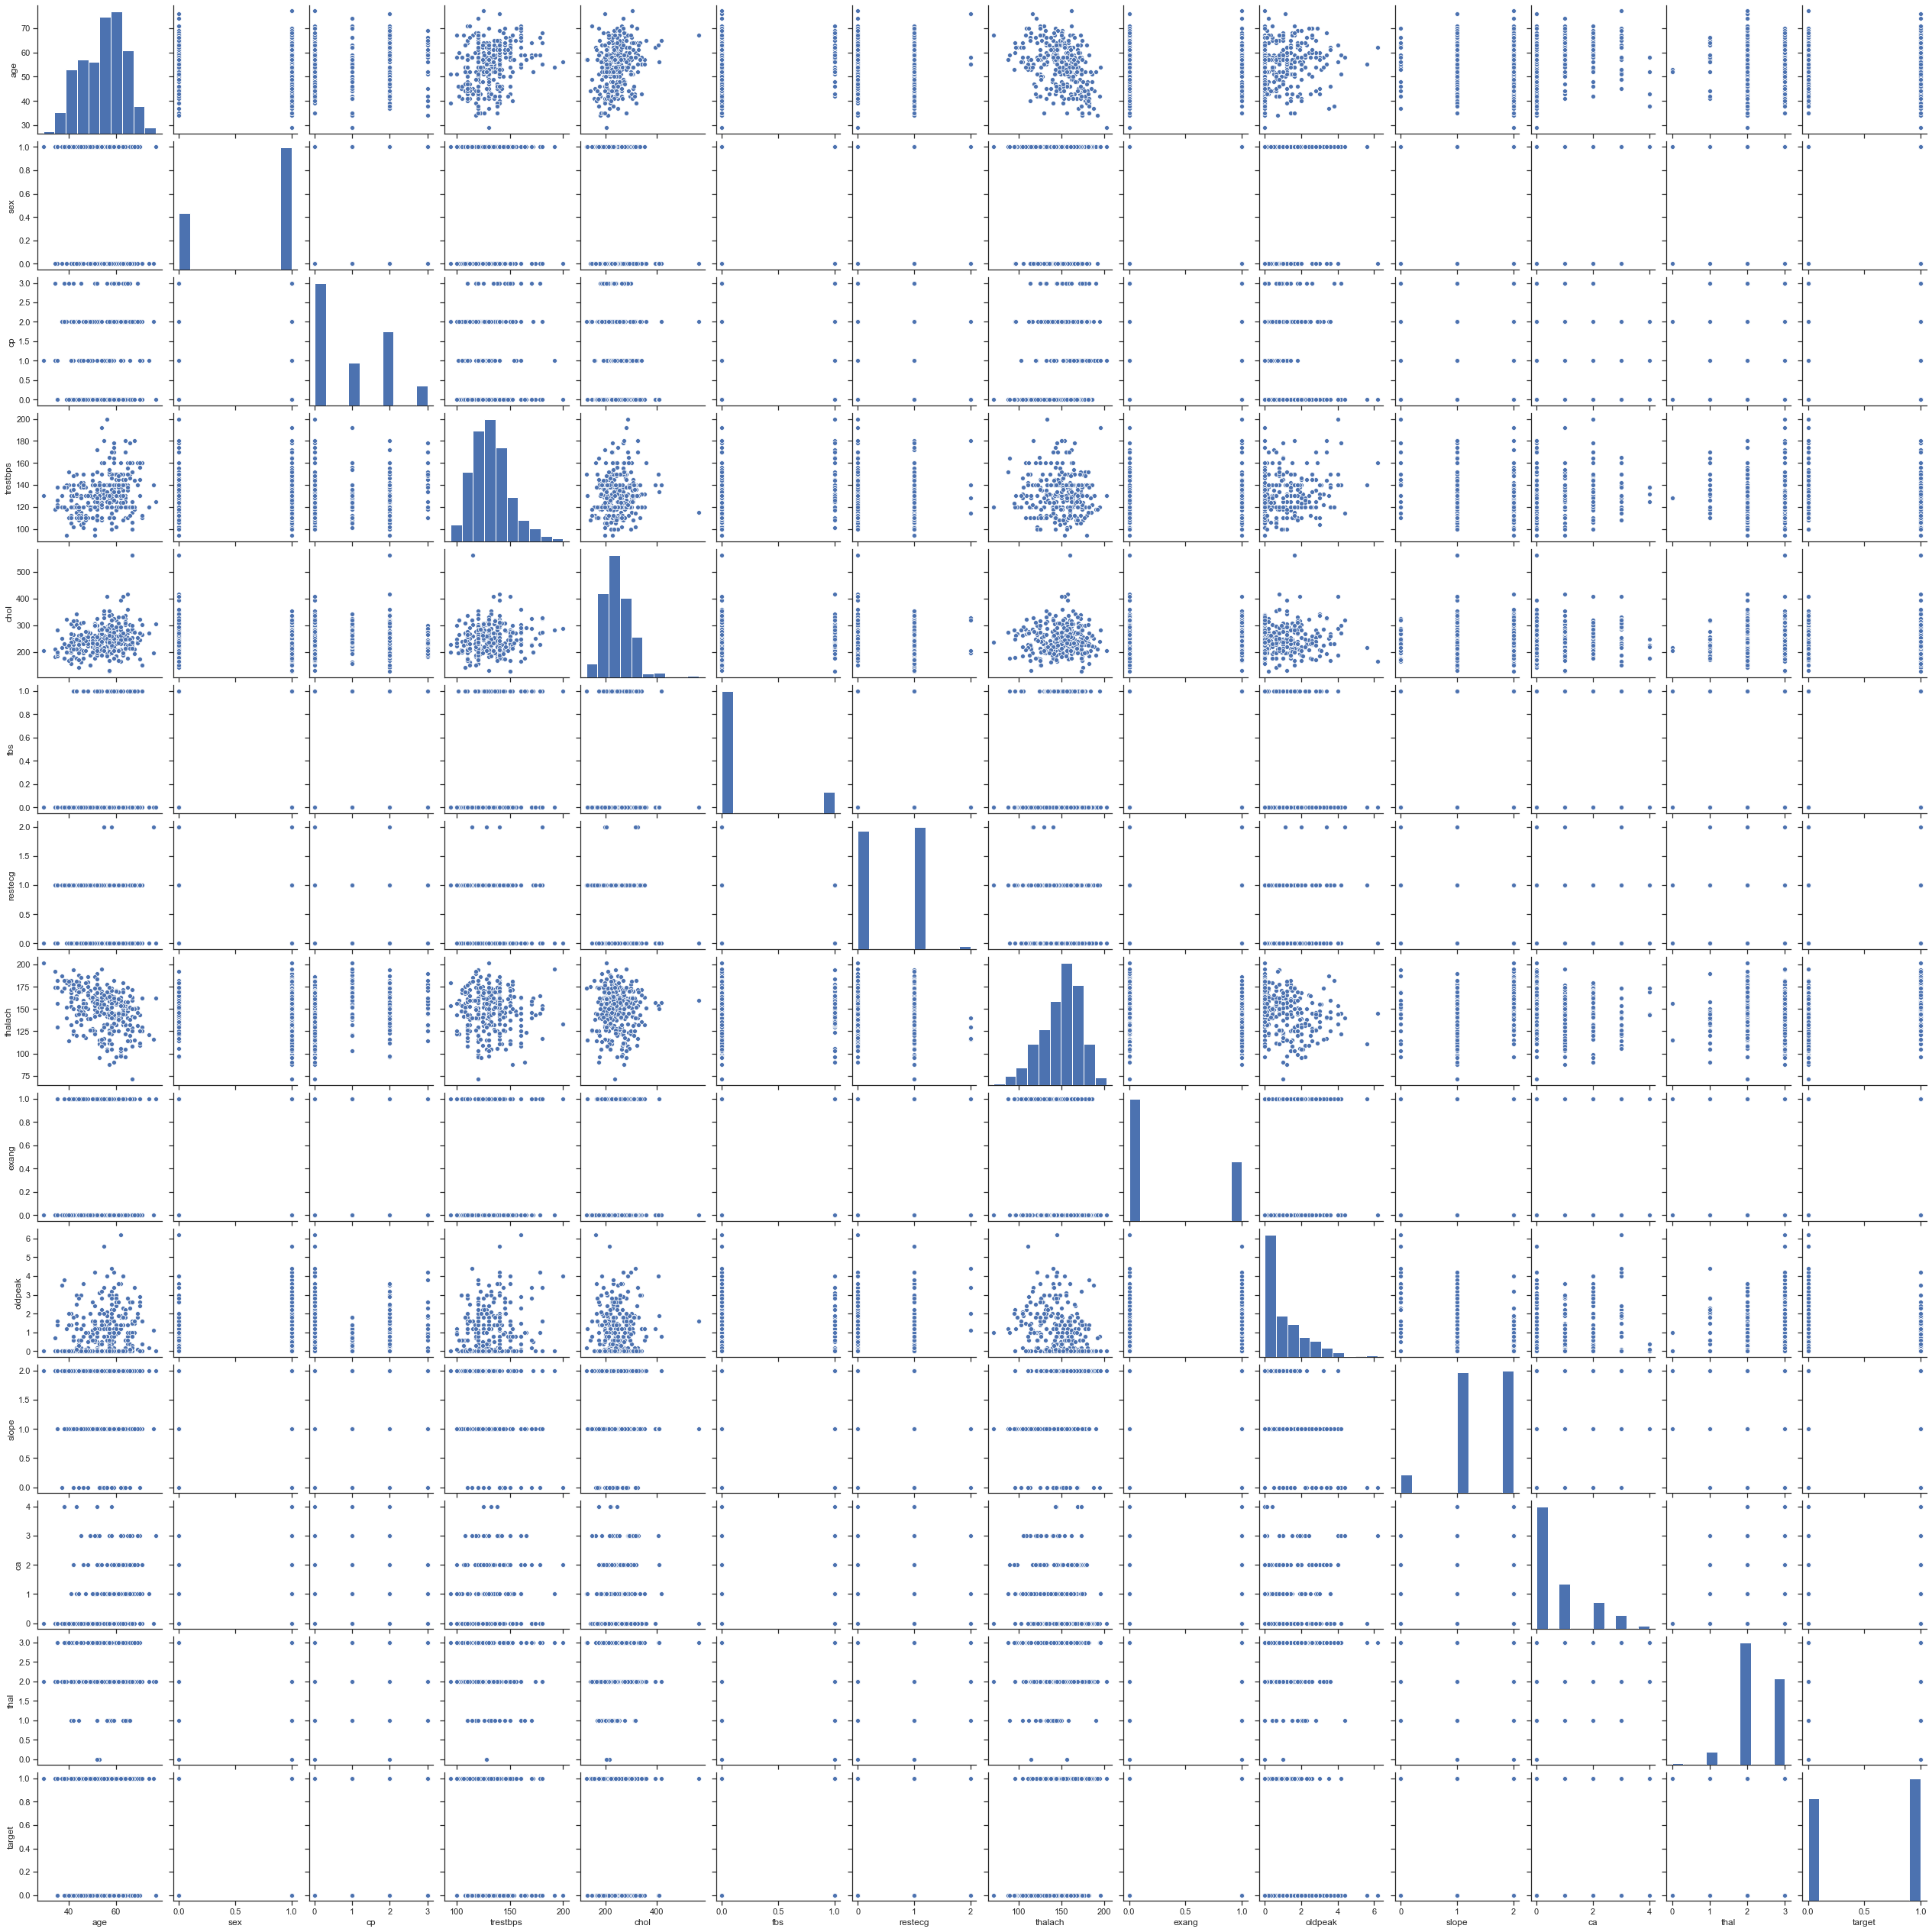

In [82]:
sns.pairplot(data)

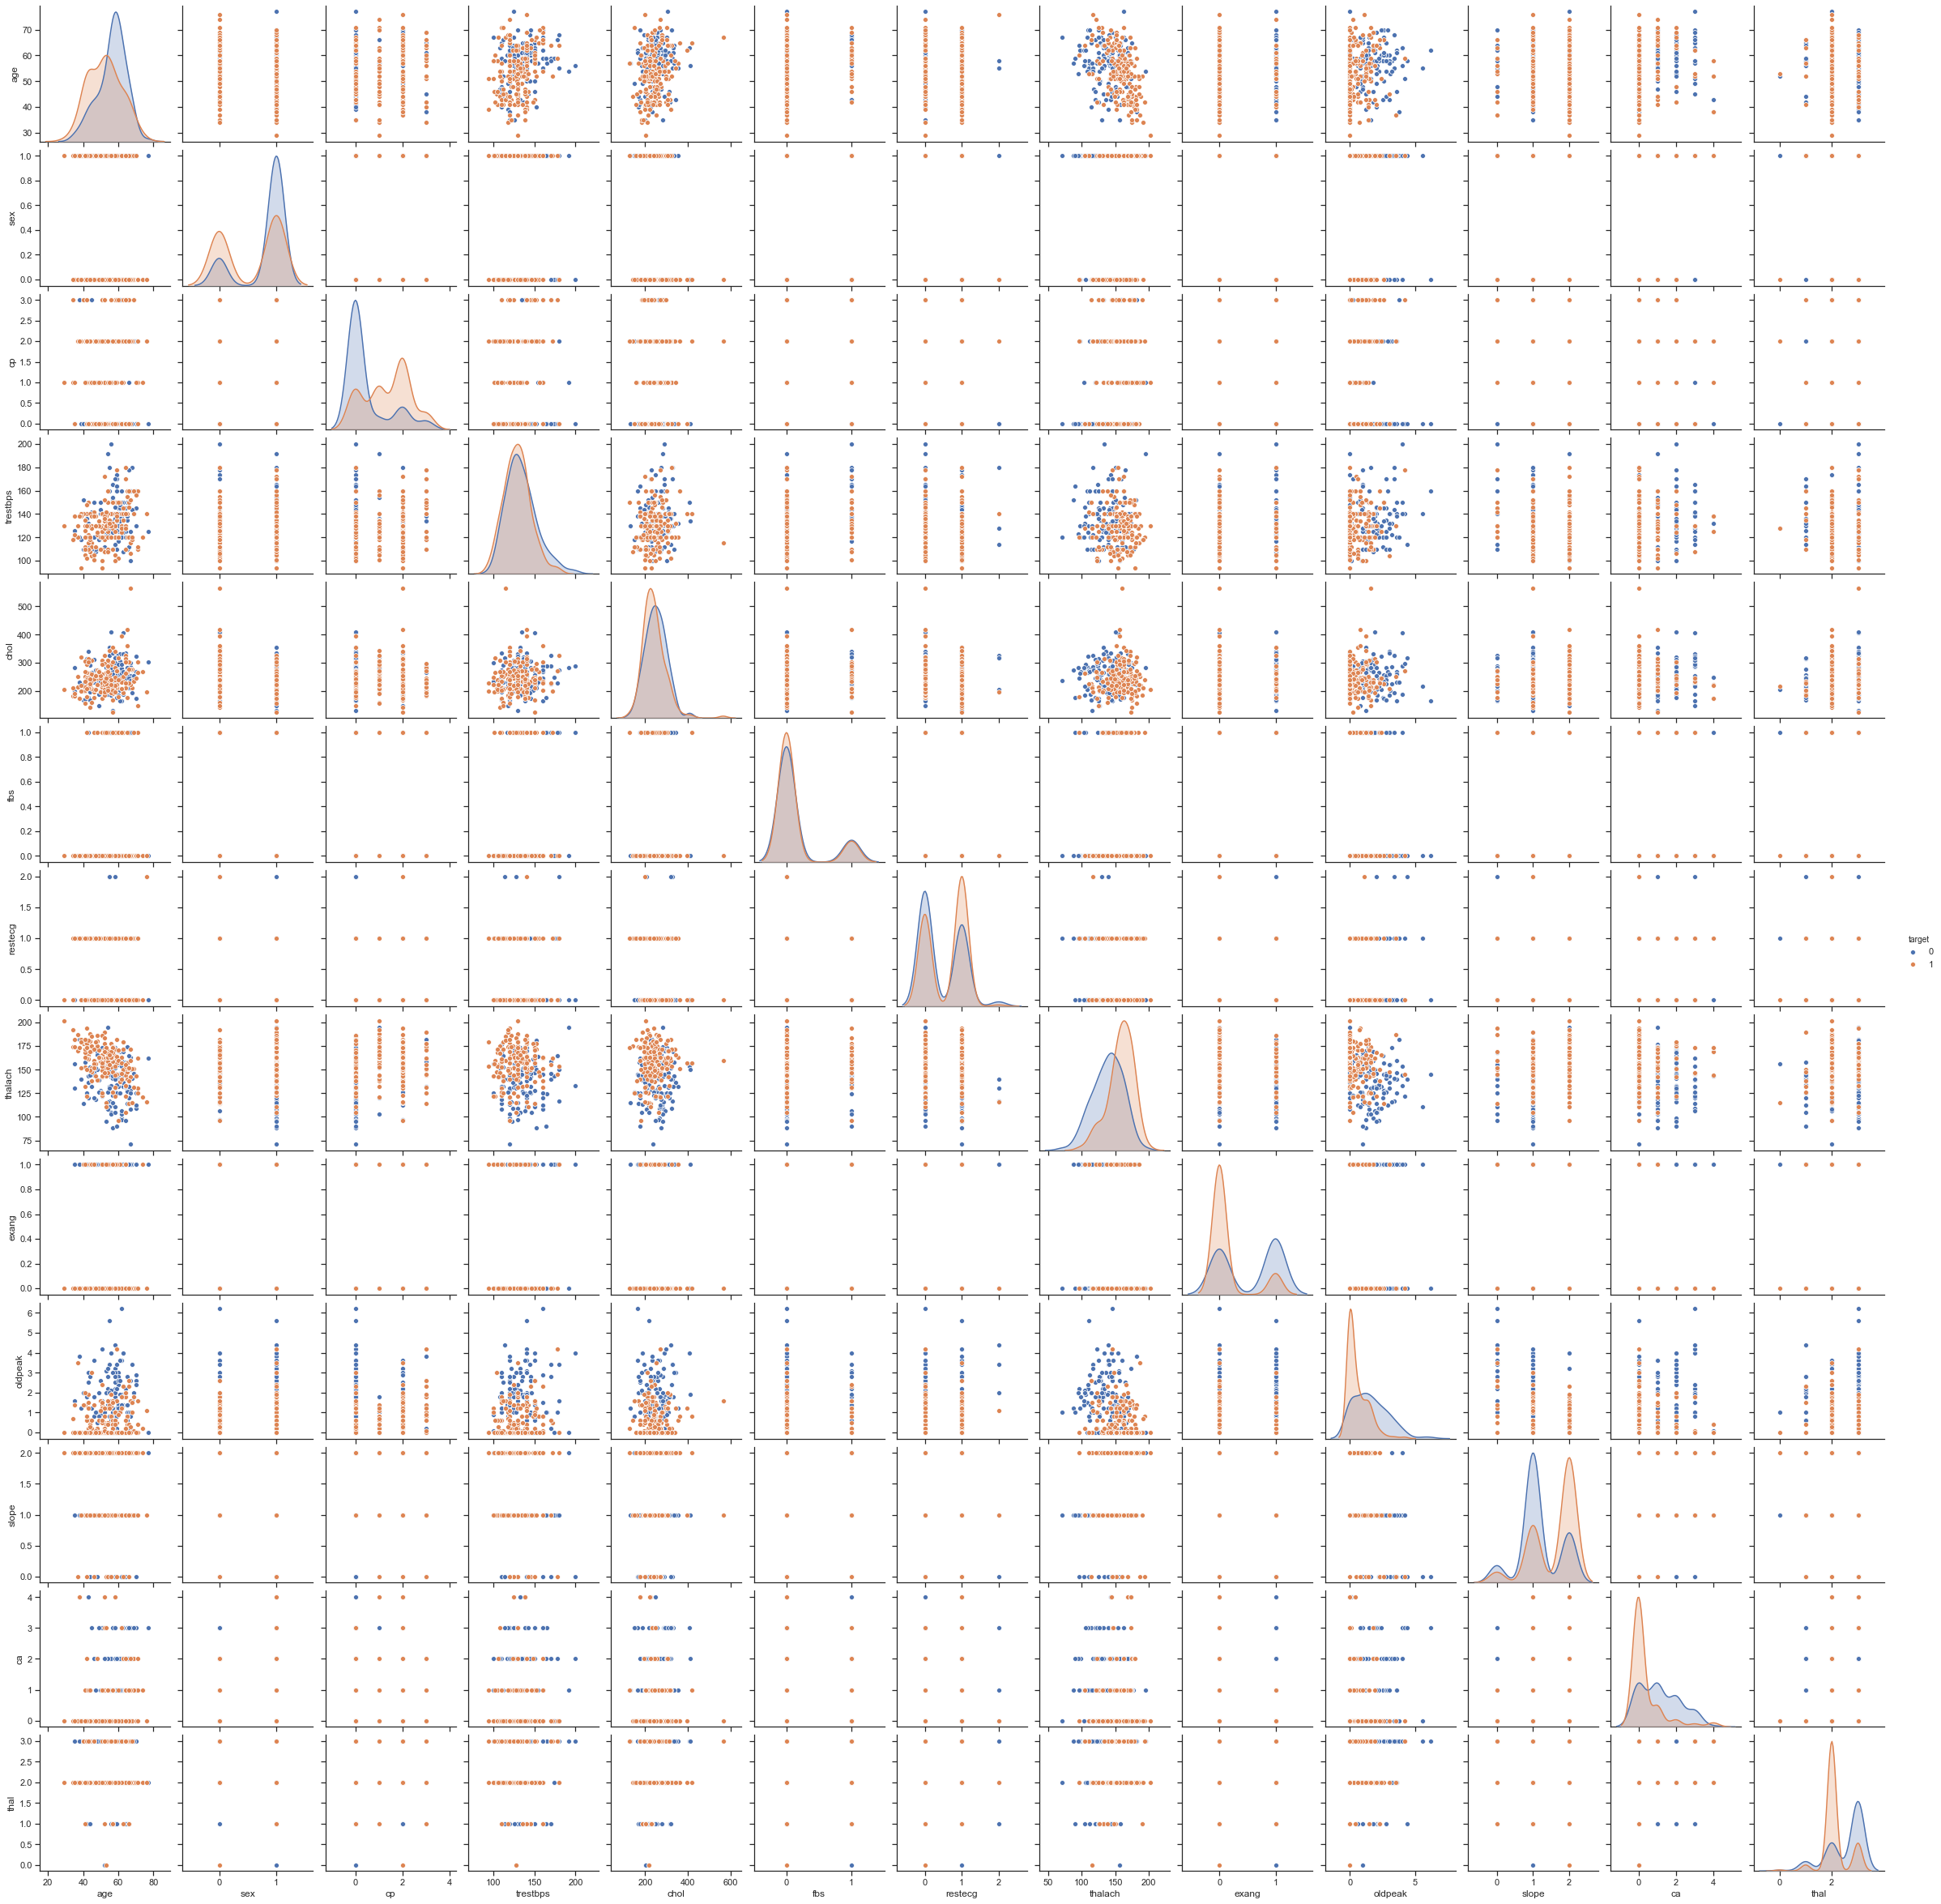

In [83]:
sns.pairplot(data, hue="target")

**Гистограммы**

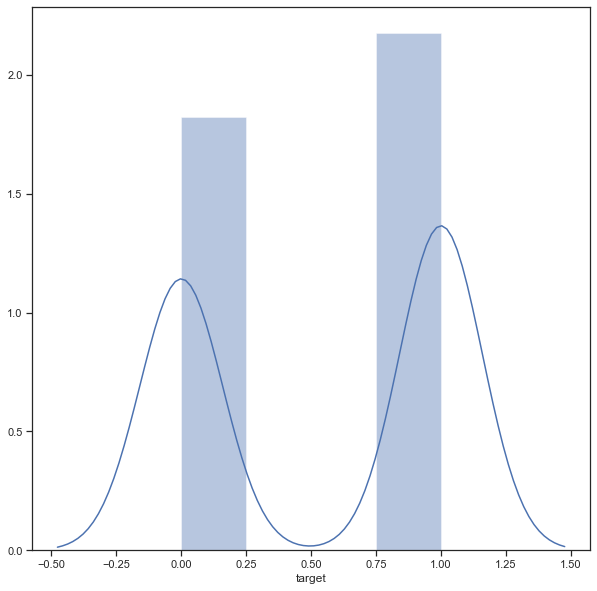

In [84]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['target'])

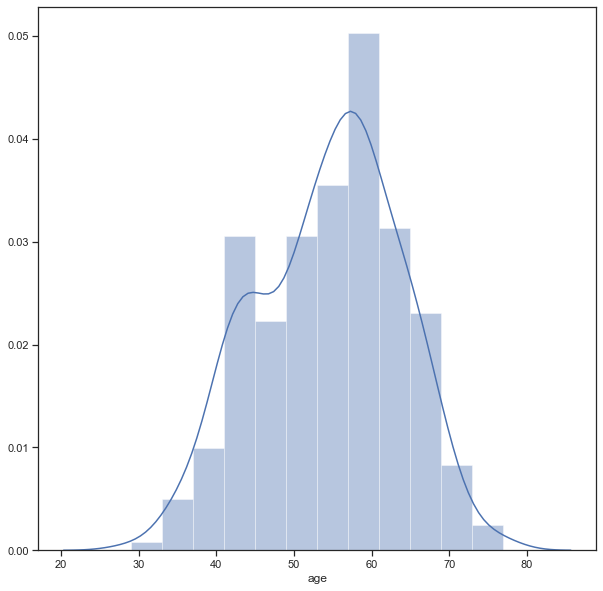

In [85]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['age'])

**Информация о корреляции признаков**

In [86]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


**Метод Heatmap для визуализации корреляционной матрицы**

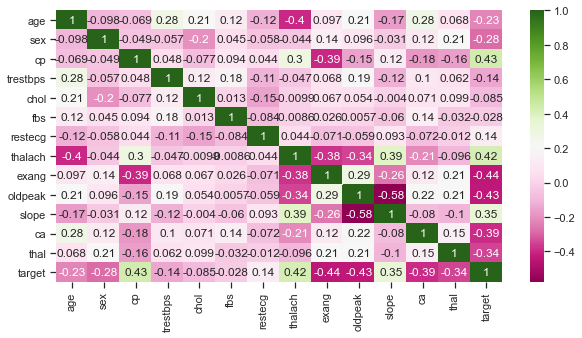

In [122]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(data.corr(), cmap='PiYG', annot=True)

**Оценка дисбаланса классов**

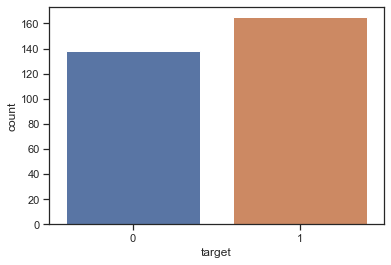

In [94]:
sns.countplot(data['target'])

In [95]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [96]:
data.shape[0]

303

In [103]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_1, class_0 = data['target'].value_counts()
print('Класс 0 составляет {}% \nКласс 1 составляет {}%'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 45.540000000000006% 
Класс 1 составляет 54.459999999999994%


**Скрипичные диаграммы**

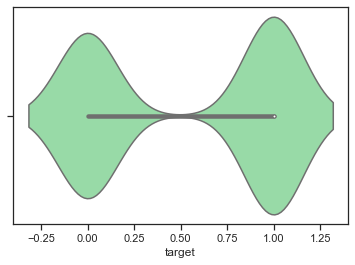

In [105]:
sns.set(style="ticks", palette="pastel")
sns.violinplot(x=data['target'], palette=["g"])

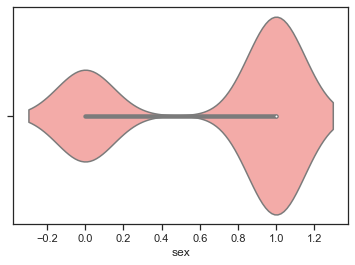

In [106]:
sns.set(style="ticks", palette="pastel")
sns.violinplot(x=data['sex'], palette=["r"])

**Jointplot**

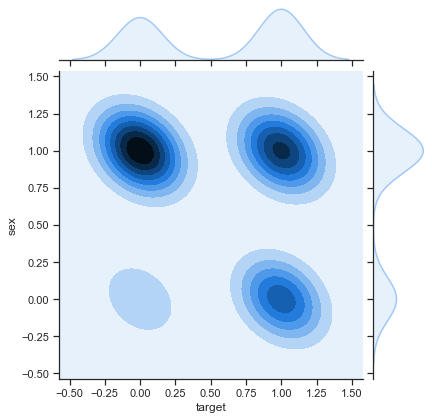

In [107]:
sns.jointplot(x='target', y='sex', data=data, kind="kde")

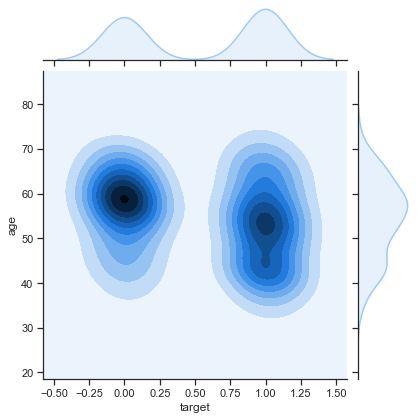

In [108]:
sns.jointplot(x='target', y='age', data=data, kind="kde")

**Разбиение данных на выборки**

In [109]:
#Подготовка данных
X = data.drop('target', axis = 1)
y = data['target']
#Разделение набора данных на обучающую и тестовую выборки 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
#Применение стандартного масштабирования для оптимизации результата 
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Ф-ция отрисовки ROC-кривой**

График, позволяющий оценить качество бинарной классификации.

In [110]:
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

**Ф-ция построения матрицы ошибок**

Количество верно и ошибочно классифицированных данных, представленное в виде матрицы.

In [111]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data   
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

**Оценка моделей**

**RFC**

*Случайный лес (RandomForest)*

In [113]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

Normalized confusion matrix


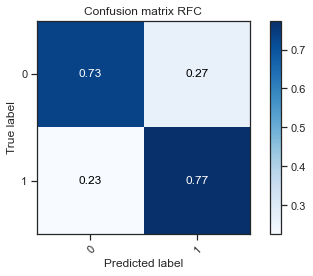

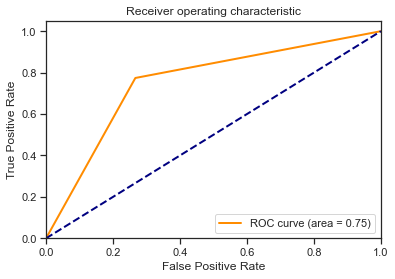

0.753763440860215

In [114]:
plot_confusion_matrix(y_test, pred_rfc, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix RFC')
draw_roc_curve(y_test.values, pred_rfc)
balanced_accuracy_score(y_test, pred_rfc)

**SGD**

*Стохастический градиентный спуск*

In [123]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

Normalized confusion matrix


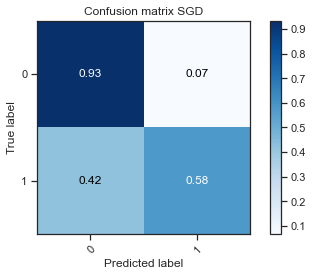

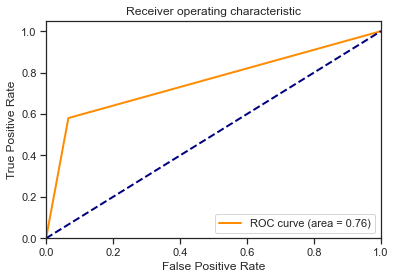

0.756989247311828

In [124]:
plot_confusion_matrix(y_test, pred_sgd, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix SGD')
draw_roc_curve(y_test.values, pred_sgd)
balanced_accuracy_score(y_test, pred_sgd)

**KNN**

*Ближайшие соседи*

In [125]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

Normalized confusion matrix


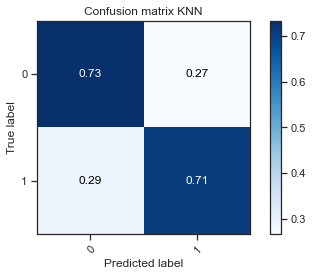

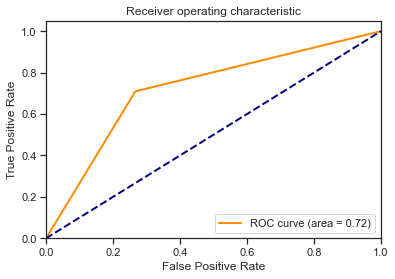

0.721505376344086

In [126]:
plot_confusion_matrix(y_test, pred_knn, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix KNN')
draw_roc_curve(y_test.values, pred_knn)
balanced_accuracy_score(y_test, pred_knn)

**GBS**

*Градиентный бустинг*

In [128]:
gbs = GradientBoostingClassifier()
gbs.fit(X_train, y_train)
pred_gbs = gbs.predict(X_test)

Normalized confusion matrix


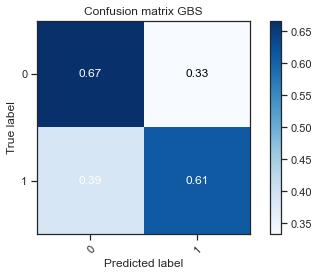

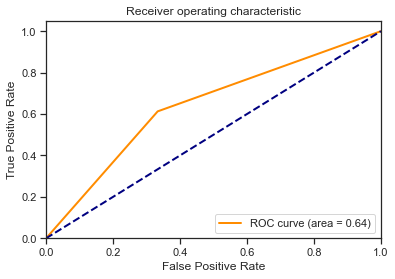

0.6397849462365591

In [189]:
plot_confusion_matrix(y_test, pred_gbs, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix GBS')
draw_roc_curve(y_test.values, pred_gbs)
balanced_accuracy_score(y_test, pred_gbs)

**SVC**

*Метод опорных векторов*

In [130]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

Normalized confusion matrix


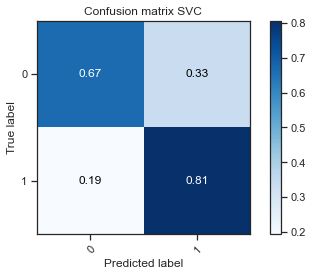

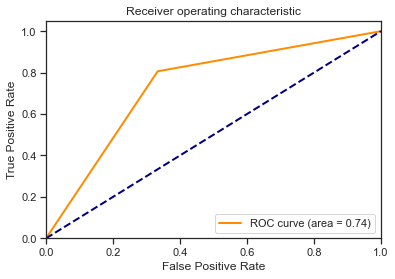

0.7365591397849462

In [132]:
plot_confusion_matrix(y_test, pred_svc, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix SVC')
draw_roc_curve(y_test.values, pred_svc)
balanced_accuracy_score(y_test, pred_svc)

**Поиск оптимальных параметров для моделей**

**RFC**

In [162]:
param_rfc = {'n_estimators':[1, 3, 5, 7, 10, 13, 16, 19],
    'max_depth':[1, 3, 5, 7, 10, 13, 16, 19],
    'random_state':[0, 2, 4, 6, 8, 10, 12, 14]} 
grid_rfc = GridSearchCV(rfc, param_rfc, cv=3, scoring='balanced_accuracy')
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random

In [163]:
grid_rfc.best_params_

{'max_depth': 7, 'n_estimators': 13, 'random_state': 0}

Normalized confusion matrix


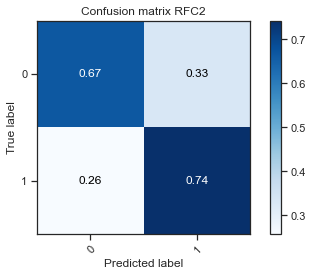

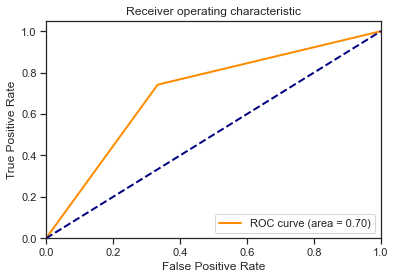

0.7043010752688172

In [153]:
rfc2 = RandomForestClassifier(n_estimators=13, max_depth=7, random_state=0)
rfc2.fit(X_train, y_train)
pred_rfc2 = rfc2.predict(X_test)
plot_confusion_matrix(y_test, pred_rfc2, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix RFC2')
draw_roc_curve(y_test.values, pred_rfc2)
balanced_accuracy_score(y_test, pred_rfc2)

**SGD**

In [172]:
param_sgd = {'alpha': [0.5, 0.4, 0.3, 0.2, 0.1]}
grid_sgd = GridSearchCV(sgd, param_sgd, cv=3, scoring='balanced_accuracy')
grid_sgd.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty=None, power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.5, 0.4, 0.3, 0.2, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='balanced_accuracy', verbose=0)

In [173]:
grid_sgd.best_params_

{'alpha': 0.2}

Normalized confusion matrix


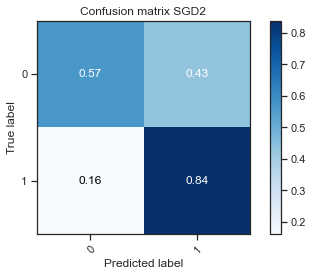

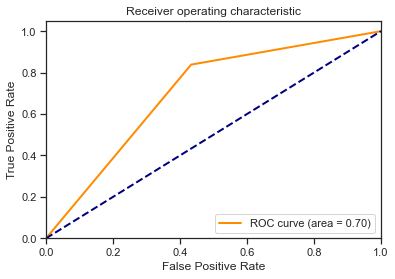

0.7026881720430107

In [174]:
sgd2 = SGDClassifier(alpha=0.2)
sgd2.fit(X_train, y_train)
pred_sgd2 = sgd2.predict(X_test)
plot_confusion_matrix(y_test, pred_sgd2, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix SGD2')
draw_roc_curve(y_test.values, pred_sgd2)
balanced_accuracy_score(y_test, pred_sgd2)

**KNN**

In [178]:
n_range = np.array(range(1,100,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
         86, 91, 96])}]

In [179]:
grid_knn = GridSearchCV(knn, tuned_parameters, cv=3, scoring='balanced_accuracy')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='balanced_accuracy', verbose=0)

In [180]:
grid_knn.best_params_

{'n_neighbors': 6}

Normalized confusion matrix


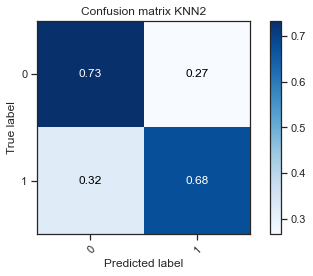

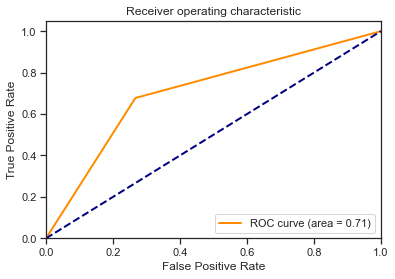

0.7053763440860215

In [181]:
knn2 = KNeighborsClassifier(n_neighbors=6)
knn2.fit(X_train, y_train)
pred_knn2 = knn2.predict(X_test)
plot_confusion_matrix(y_test, pred_knn2, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix KNN2')
draw_roc_curve(y_test.values, pred_knn2)
balanced_accuracy_score(y_test, pred_knn2)

**GBS**

In [182]:
param_gbs = {'n_estimators':[1, 3, 5, 7, 10, 13, 16], 
                            'max_depth':[1, 3, 5, 7, 10, 13, 16],
                            'learning_rate':[0.01, 0.05, 0.1, 0.5, 2, 3, 4, 5]}
grid_gbs = GridSearchCV(gbs, param_gbs, scoring='balanced_accuracy', cv=3)
grid_gbs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [183]:
grid_gbs.best_params_

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 16}

Normalized confusion matrix


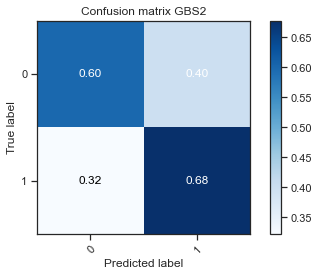

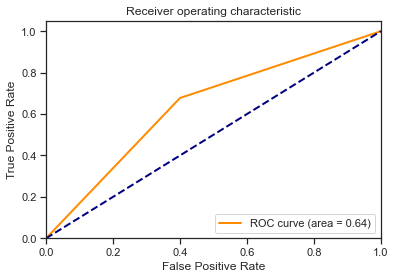

0.6387096774193548

In [188]:
gbs2 = GradientBoostingClassifier(n_estimators=16, max_depth=5, learning_rate=0.5)
gbs2.fit(X_train, y_train)
pred_gbs2 = gbs2.predict(X_test)
plot_confusion_matrix(y_test, pred_gbs2, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix GBS2')
draw_roc_curve(y_test.values, pred_gbs2)
balanced_accuracy_score(y_test, pred_gbs2)

**SVC**

In [185]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='balanced_accuracy', cv=3)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='balanced_accuracy', verbose=0)

In [186]:
grid_svc.best_params_

{'C': 0.8, 'gamma': 0.8, 'kernel': 'rbf'}

Normalized confusion matrix


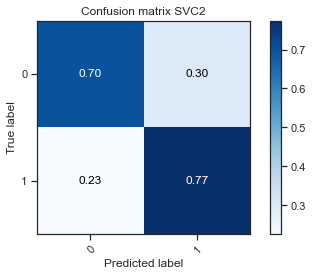

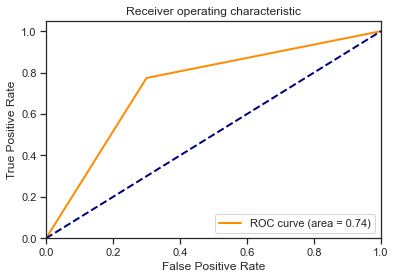

0.7370967741935484

In [187]:
svc2 = SVC(C = 0.8, gamma =  0.8, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
plot_confusion_matrix(y_test, pred_svc2, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix SVC2')
draw_roc_curve(y_test.values, pred_svc2)
balanced_accuracy_score(y_test, pred_svc2)

**Сравнение результатов**

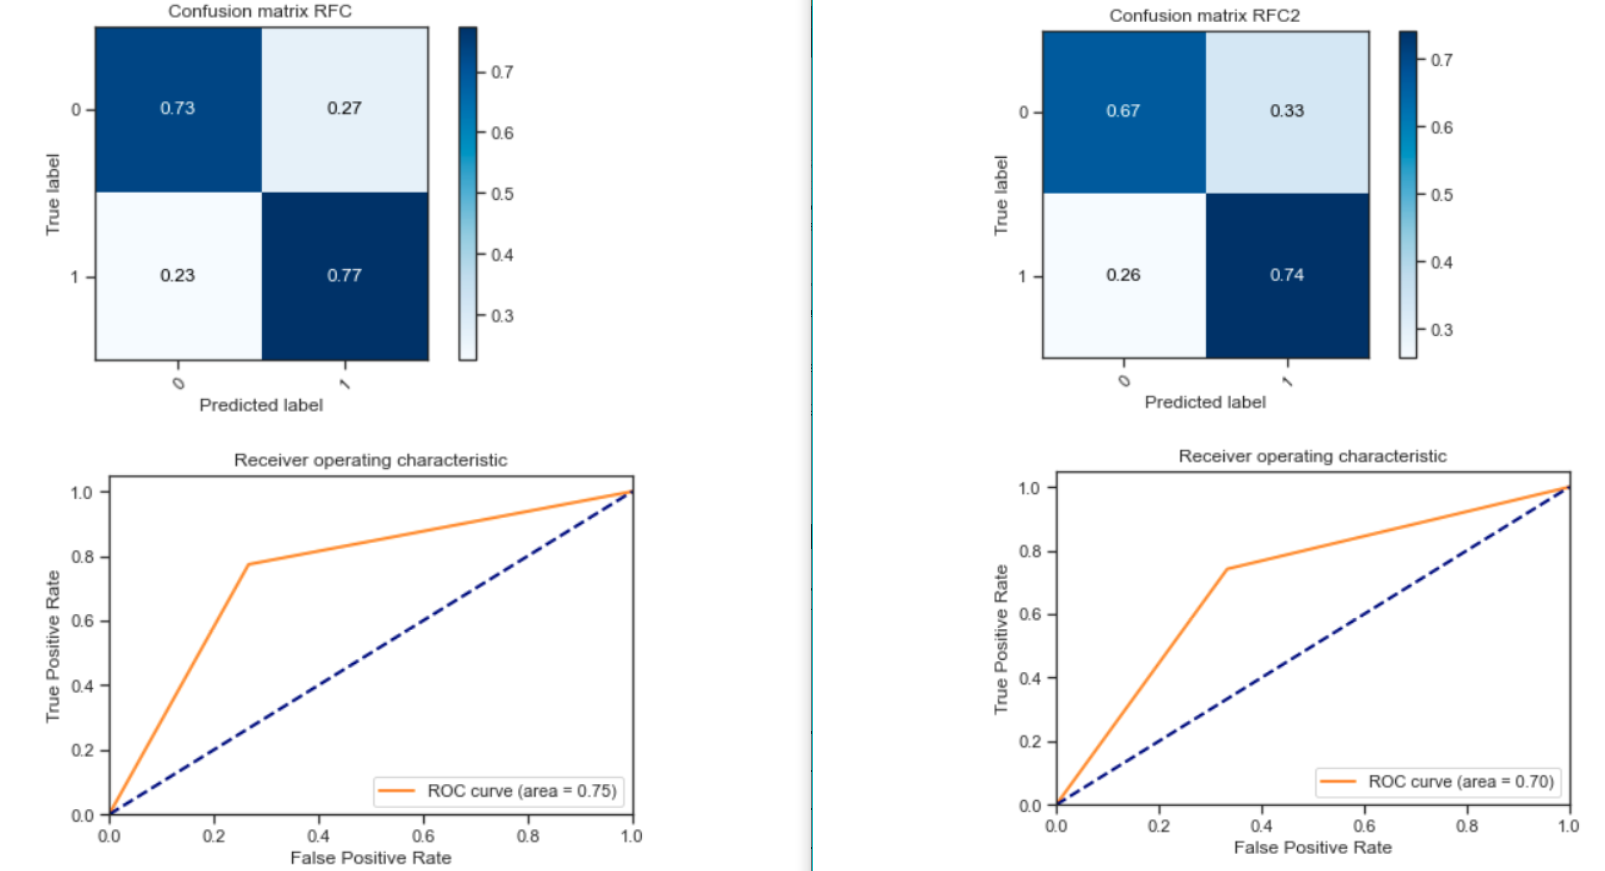

In [191]:
Image("img/RFC_screen.png")

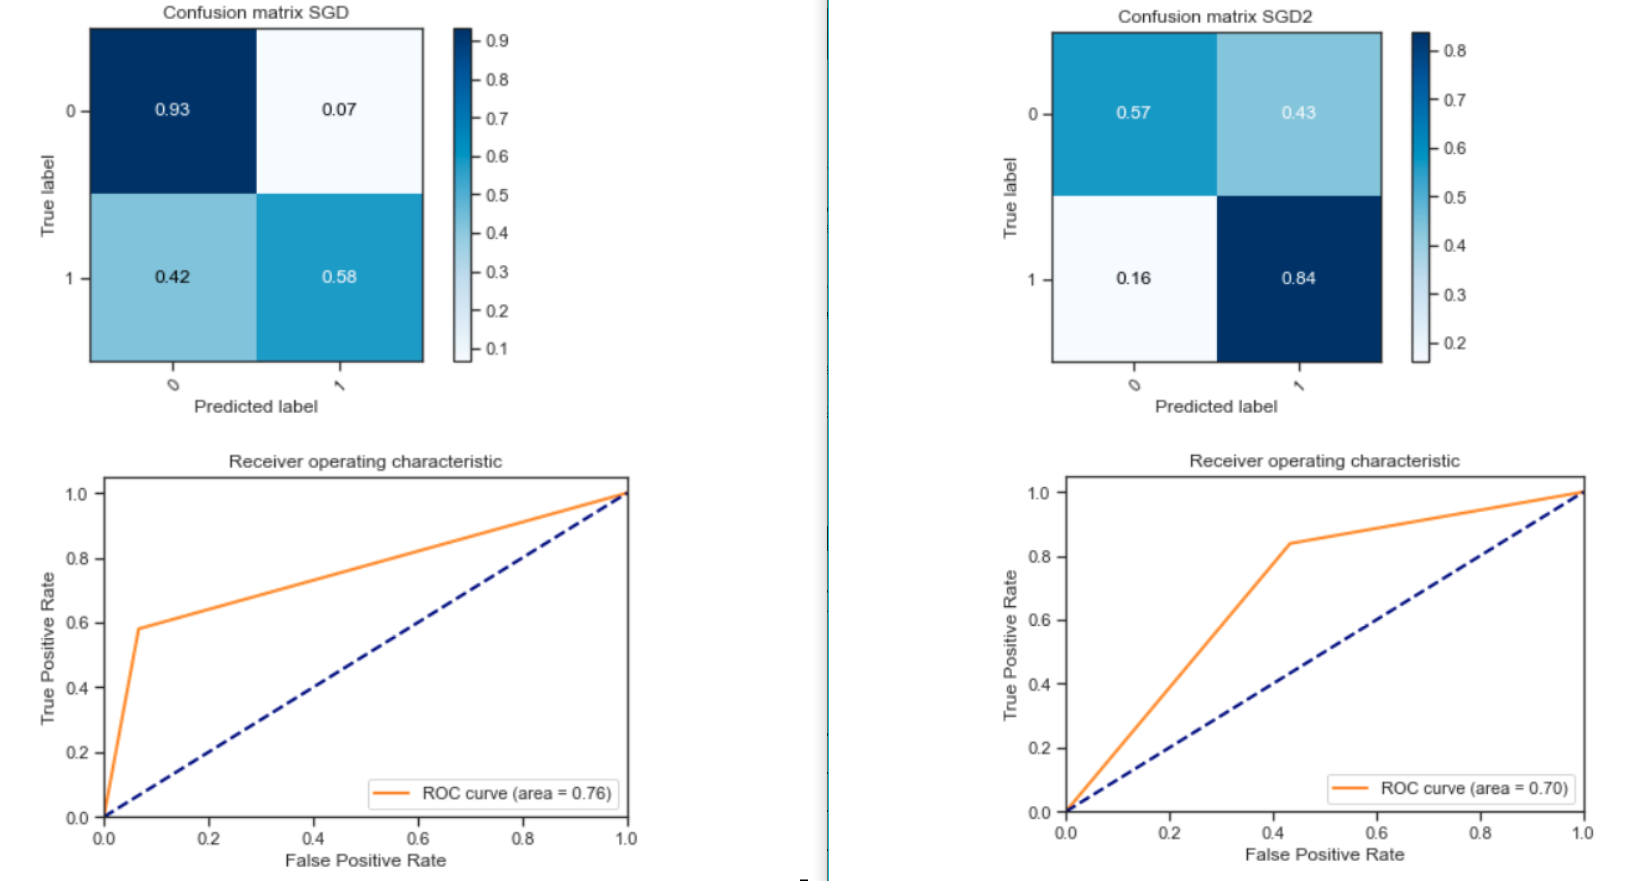

In [192]:
Image("img/SGD_screen.png")

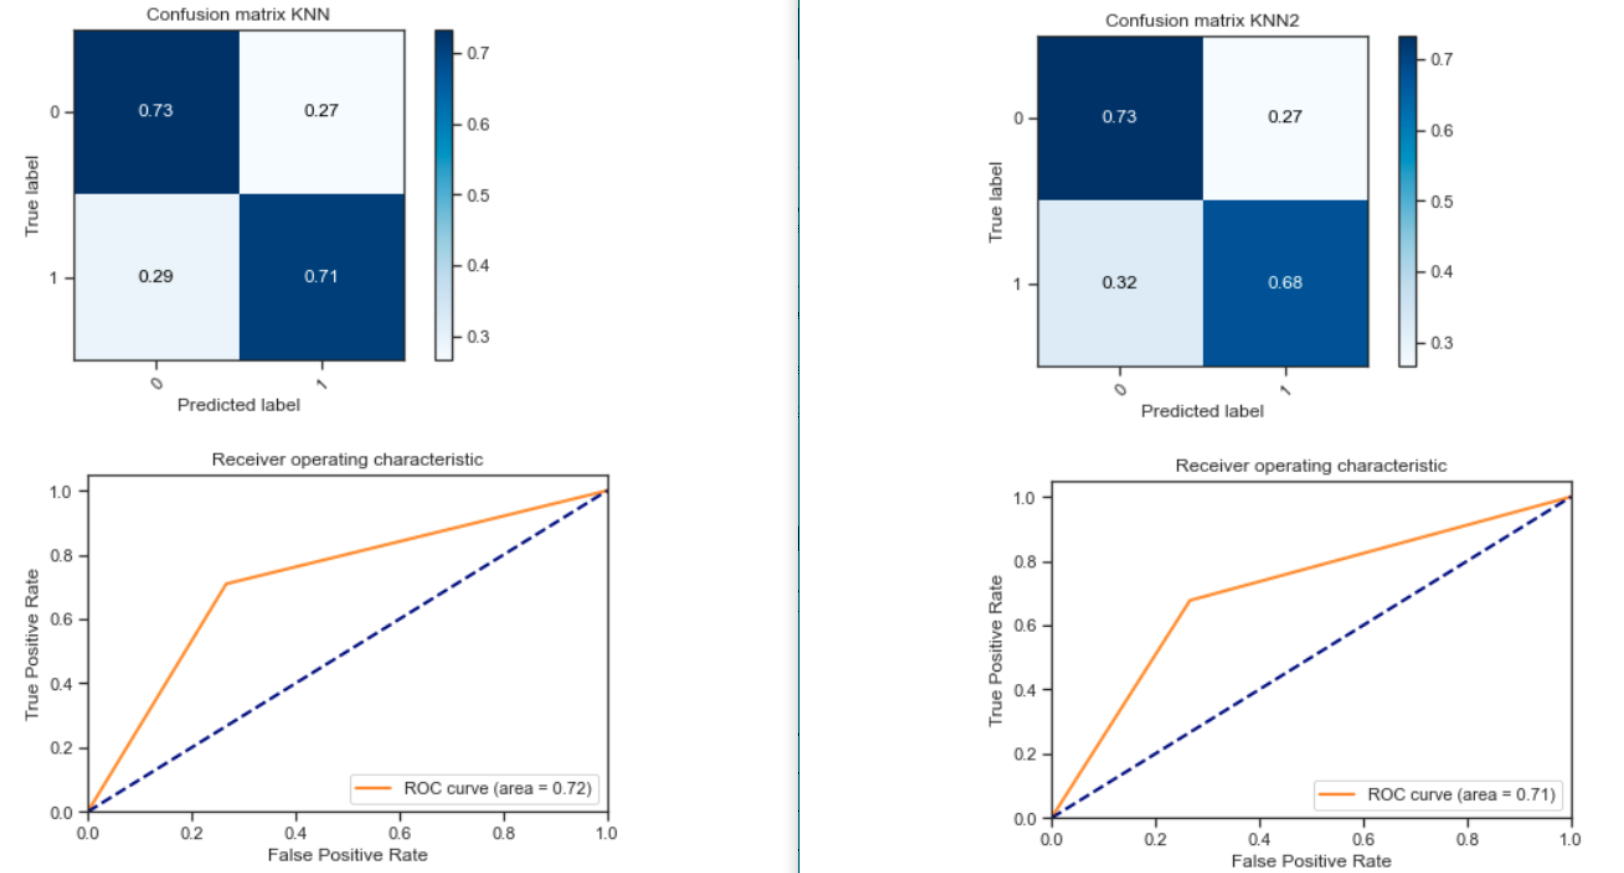

In [193]:
Image("img/KNN_screen.png")

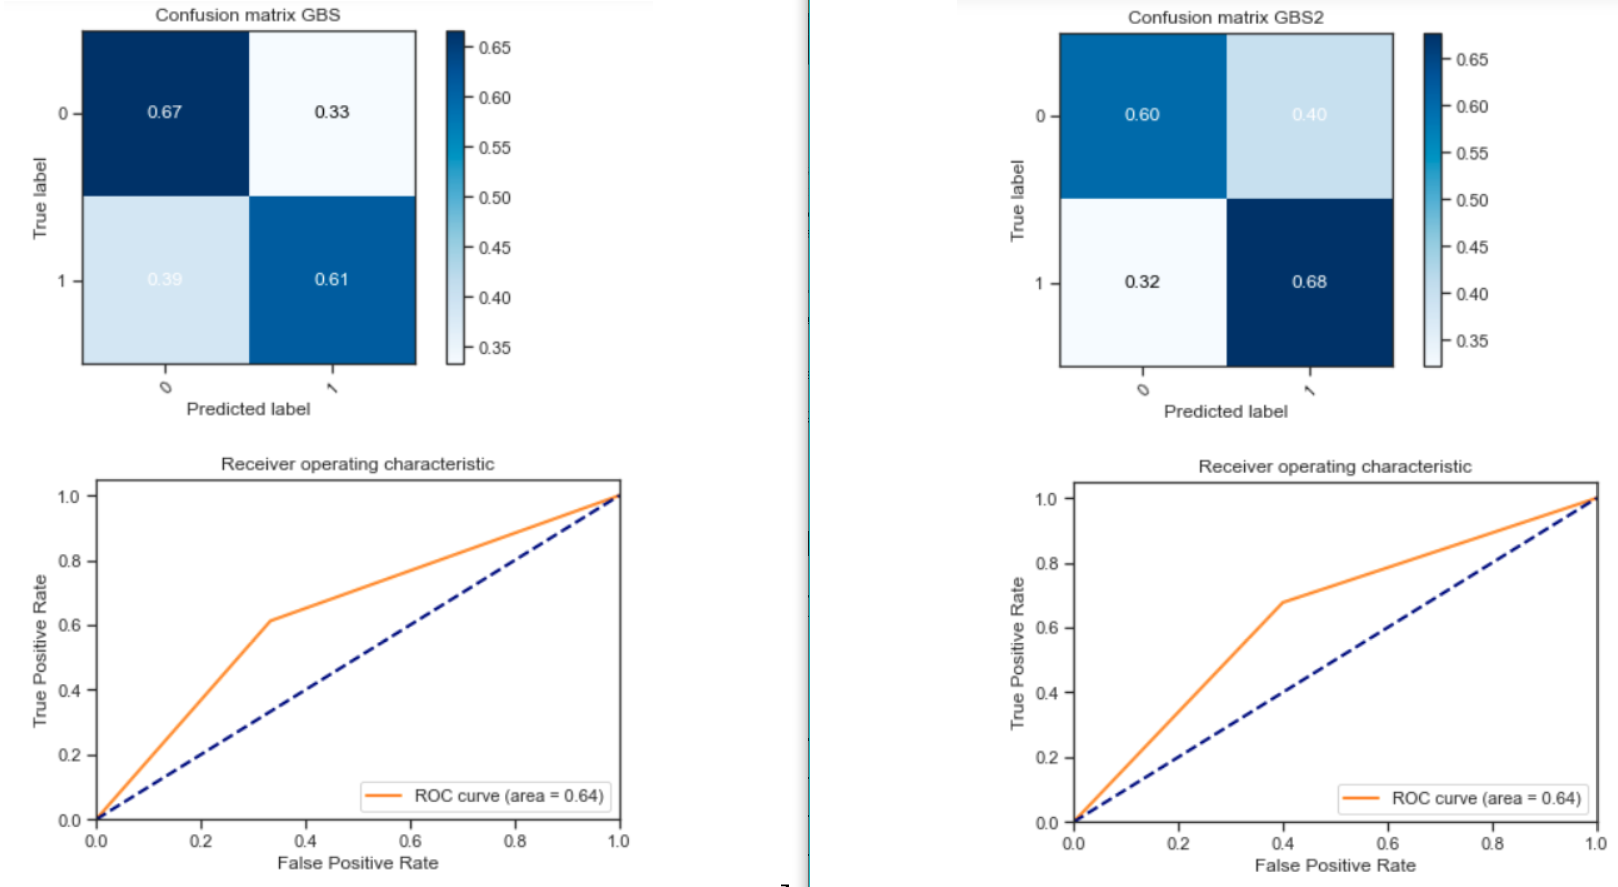

In [194]:
Image("img/GBS_screen.png")

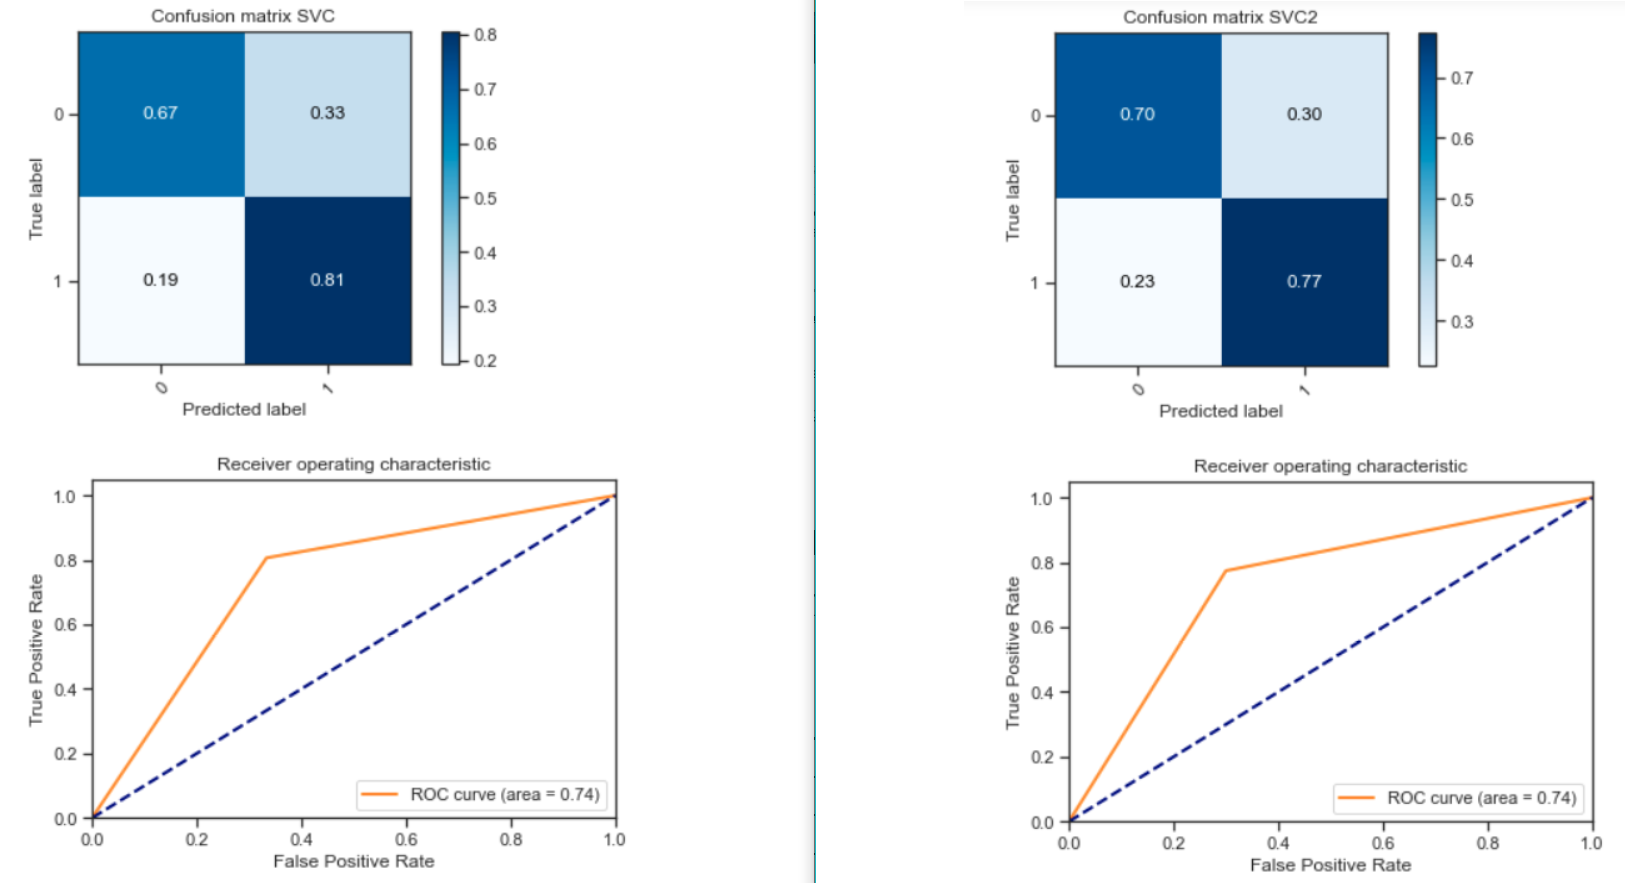

In [195]:
Image("img/SVC_screen.png")